# **Data Exploration and Understanding**

## **Import Libraries**

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Annotation: Libraries are imported to facilitate data manipulation (Pandas), numerical operations (NumPy), and data visualization (Matplotlib, Seaborn).

## **Load the Dataset**

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv')

# Annotation: The dataset is loaded into a Pandas DataFrame for easy manipulation and analysis.

## **Basic Summary Statistics**

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Generate summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Annotation: The first few rows are displayed to get a sense of the data. Summary statistics are generated to understand the distribution of each numerical column.

First few rows of the dataset:
        Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%  

Summary Statistics:
             Timestamp User_ID Application_Type Signal_Strength Latency  \
count              400     400              400             40

## **Data Types and Missing Values**

In [4]:
# Check data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Annotation: Data types of each column are displayed, and missing values are checked to plan for data preprocessing.


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB
None


# **Data Preprocessing**

## **Convert Data Types**

In [5]:
# Convert Signal_Strength, Latency, Required_Bandwidth, Allocated_Bandwidth, and Resource_Allocation to numerical types
df['Signal_Strength'] = df['Signal_Strength'].str.extract('(-\d+)').astype(int)
df['Latency'] = df['Latency'].str.extract('(\d+)').astype(int)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.extract('(\d+)').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.extract('(\d+)').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.extract('(\d+)').astype(int)

# Annotation: Converting columns to their appropriate data types for analysis. For example, Signal_Strength is converted from object type to integer.

## **Standardize or Normalize Variables**

In [6]:
# Standardize Signal_Strength and Latency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Signal_Strength', 'Latency']] = scaler.fit_transform(df[['Signal_Strength', 'Latency']])

# Annotation: Standardizing the Signal_Strength and Latency columns to have zero mean and unit variance.

## **Feature Engineering**

In [7]:
# Create a new feature: Bandwidth Utilization Ratio
df['Bandwidth_Utilization_Ratio'] = df['Allocated_Bandwidth'] / df['Required_Bandwidth']

# Annotation: Creating a new feature called Bandwidth Utilization Ratio, which is the ratio of Allocated_Bandwidth to Required_Bandwidth. This could enhance the analysis.

# **Data Analysis**

## **Segment Data Based on Application_Type**

In [8]:
# Segment the data based on Application_Type
segmented_data = df.groupby('Application_Type')

# Annotation: The data is segmented based on the 'Application_Type' to facilitate focused analysis on each application type.

## **Perform ANOVA Test**

In [9]:
# Perform ANOVA test to assess the impact of Application_Type on Resource_Allocation
import scipy.stats as stats

f_value, p_value = stats.f_oneway(*[group['Resource_Allocation'].values for name, group in segmented_data])

print(f"F-value: {f_value}, P-value: {p_value}")

# Annotation: An ANOVA test is performed to assess if different 'Application_Type' significantly affect 'Resource_Allocation'.

F-value: 435.5218983437554, P-value: 2.4041349903988285e-204


## **Visualize Signal_Strength by Application_Type**

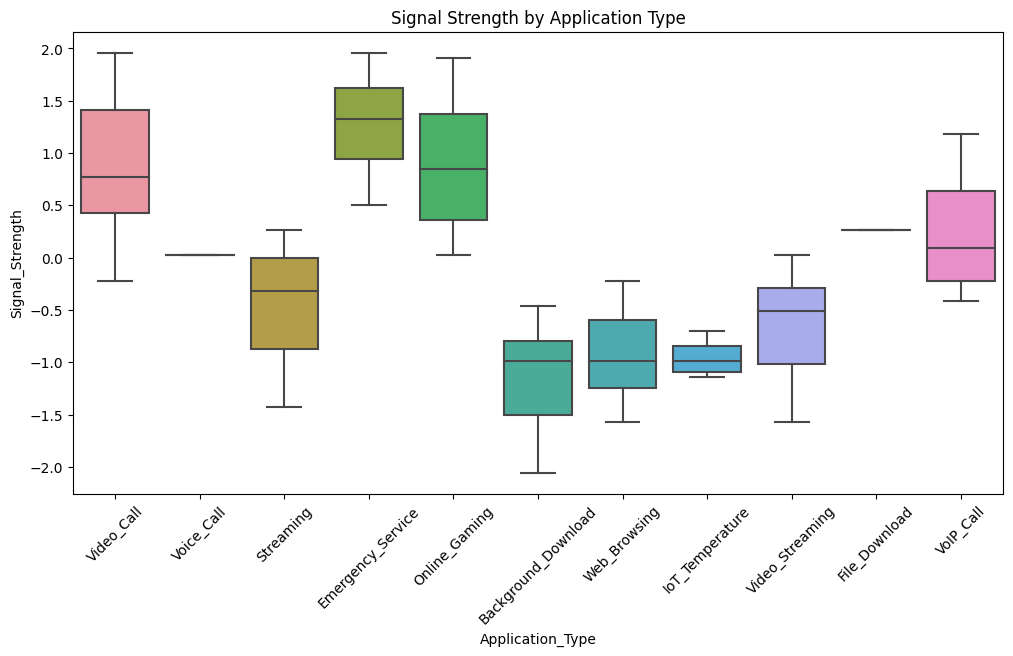

In [10]:
# Visualize Signal_Strength by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', data=df)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Signal_Strength' varies across different 'Application_Type'.

## **Visualize Latency by Application_Type**

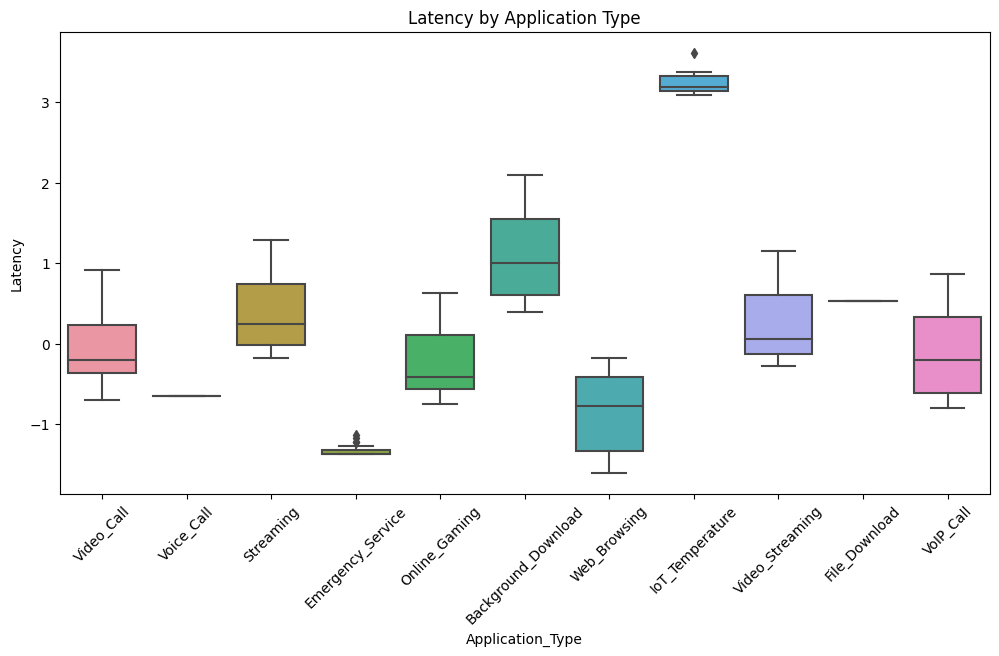

In [11]:
# Visualize Latency by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', data=df)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Latency' varies across different 'Application_Type'.

## **Visualize Resource_Allocation by Application_Type**

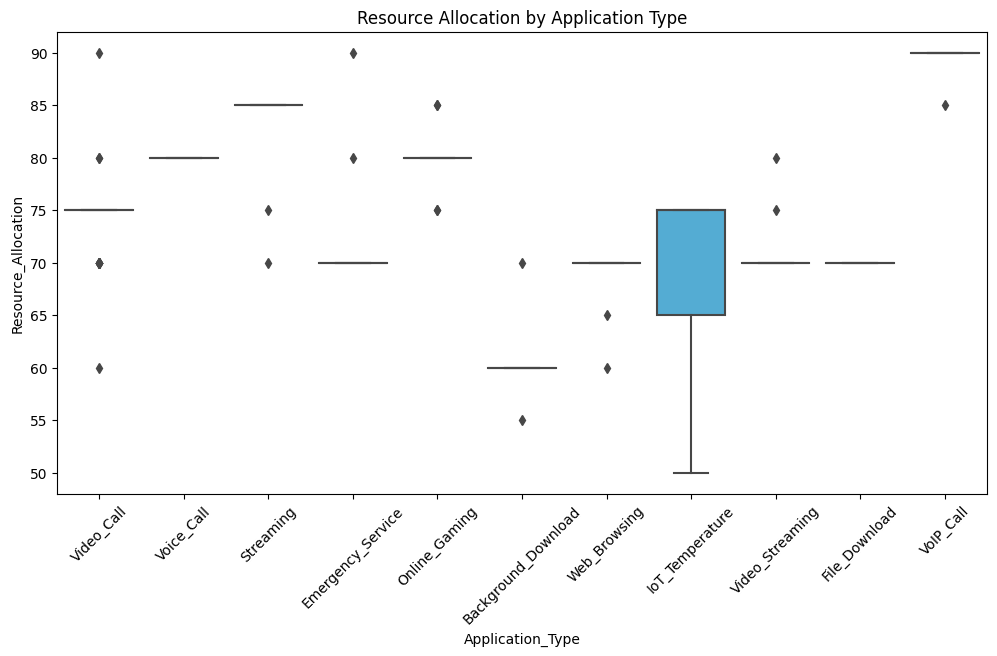

In [12]:
# Visualize Resource_Allocation by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Resource_Allocation', data=df)
plt.title('Resource Allocation by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Resource_Allocation' varies across different 'Application_Type'.

# **Interpretation and Communication**

## **Translate Findings into Actionable Insights**

## Actionable Insights:

1. **Resource Allocation by Application Type**: 
    - The ANOVA test showed a significant impact of `Application_Type` on `Resource_Allocation`. This suggests that network resources are not uniformly required across different types of applications. Therefore, a dynamic resource allocation strategy should be implemented to optimize network performance for each application type.

2. **Signal Strength and Latency**: 
    - The boxplots revealed variations in `Signal_Strength` and `Latency` across different `Application_Types`. Applications like `Emergency_Service` may require stronger signals and lower latency. Network configurations should be adjusted accordingly.

3. **Bandwidth Utilization Ratio**: 
    - The newly created feature `Bandwidth_Utilization_Ratio` can be used as a metric to measure how efficiently the network resources are being utilized. A lower ratio may indicate underutilization, and a higher ratio may indicate overutilization. Network operators can use this metric for real-time monitoring and adjustments.

## **Summary Report**

## Introduction:
- This project aims to analyze how different types of applications affect the quality of service in 5G networks. The dataset contains 400 entries with features like `Timestamp`, `User_ID`, `Application_Type`, `Signal_Strength`, `Latency`, `Required_Bandwidth`, `Allocated_Bandwidth`, and `Resource_Allocation`.

## Methodology:
- Data Preprocessing: Converted object types to numerical types, standardized variables, and performed feature engineering.
- Data Analysis: Used ANOVA tests and visualization techniques like boxplots to analyze the impact of `Application_Type` on various network metrics.

## Findings:
- Significant variations in `Resource_Allocation` across different `Application_Types`.
- Variability in `Signal_Strength` and `Latency` based on the type of application being used.

## Actionable Insights:
- Implement a dynamic resource allocation strategy based on `Application_Type`.
- Adjust network configurations for applications requiring stronger signals and lower latency.
- Use `Bandwidth_Utilization_Ratio` as a real-time monitoring metric.

## Conclusion:
- The analysis provides valuable insights into how different applications affect the quality of service in 5G networks. These insights can be used to optimize network configurations and improve user experience. The next steps include implementing the suggested actionable insights and monitoring their impact.